In [1]:
from torchvision import datasets
from torchvision import transforms
import torch
import torch.nn as nn
import numpy as np

c:\Users\Charl\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
rootdir = '/Data_cfar10'
T = datasets.CIFAR10(rootdir,train=True,download=True)
V = datasets.CIFAR10(rootdir,train=False,download=True)

100%|██████████| 170498071/170498071 [01:48<00:00, 1567768.33it/s]


Extracting /Data_cfar10\cifar-10-python.tar.gz to /Data_cfar10
Files already downloaded and verified


In [4]:
input_dim = 10 
n = 1000
inputs = np.random.rand(n, input_dim)
outputs = np.random.randint(0, 2, n)

tensor_inputs = torch.Tensor(X)
tensor_outputs = torch.Tensor(outputs)
tensor_df = torch._utils.data.TensorDataset(tensor_inputs, tensor_outputs)
dataset_loader = torch.utils.data.DataLoader(tensor_df, batch_size=16, shuffle=True, drop_last=True)


In [ ]:
first_layer_neurons = 200
second_layer_neurons = 100

In [ ]:
model = nn.Sequential(
    nn.Linear(input_dim, first_layer_neurons),
    nn.ReLU(), # Activation Function
    nn.Linear(first_layer_neurons, second_layer_neurons),
    nn.Tanh(), # Activation Function
    nn.Linear(second_layer_neurons, 1),
    nn.Sigmoid(dim=1) # Loss Function
    )

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
loss_fn = nn.BCELoss()

In [7]:
X,y = T[12]

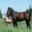

In [8]:
X

In [9]:
T.classes[y]

'horse'

In [10]:
np.array(X).shape

(32, 32, 3)

In [11]:
32*32*3

3072

In [12]:
T = datasets.CIFAR10(rootdir,train=True,download=True,
                    transform=transforms.ToTensor())
V = datasets.CIFAR10(rootdir,train=False,download=True,
                    transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [13]:
tL = torch.utils.data.DataLoader(T,batch_size=64,shuffle=True,drop_last=True)
vL = torch.utils.data.DataLoader(V,batch_size=64,shuffle=True,drop_last=True)

In [14]:
model = nn.Sequential(
    nn.Linear(3072,100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100,10),
    nn.LogSoftmax(dim=1)
)

In [15]:
loss_fn = nn.NLLLoss()

In [16]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,
                                                      len(tL))


In [17]:
nepochs = 2
for e in range(nepochs):
    eLoss = 0
    for X,y in tL:
        batch_size = X.shape[0]
        y_hat = model(X.view(batch_size,-1))
        loss = loss_fn(y_hat,y)
        eLoss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    print(float(eLoss))

1827.21533203125
1799.154052734375


In [18]:
c = 0
t = 0
with torch.no_grad():
    for Xv,yv in vL:
        batch_size = Xv.shape[0]
        y_hat = model(Xv.view(batch_size,-1))
        _,p = torch.max(y_hat,dim=1)
        t+=yv.shape[0]
        c+=int((p==yv).sum())
print(c/t)

0.0999599358974359
